In [1]:
import xarray as xr
import numpy as np
from scipy.io import loadmat
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seastar as ss
# import seastar.oscar
# import seastar.retrieval
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import re
# import os
# from scipy import interpolate

In [2]:
def iqr(da, dim):
    """Calculates interquartile range"""
    return (da.quantile(q=0.75, dim=dim) - da.quantile(q=0.25, dim=dim)).rename("iqr")


In [3]:
# Data load and pre-processing
version = 'v20221104'

oscar_path = "../DATA/OSCAR/" + version + "/matlab-pre-processed/"

file_time_triplets = ss.utils.tools.find_file_triplets(oscar_path)

print('OSCAR L1 processing - version ' + version)
print('-------------------')
print('File path :', oscar_path)
print('-------------------')
for i in range(len(file_time_triplets)):
    print('File index :', i, ',', 'Aquisition time :', file_time_triplets[i][0], ',', 'File list indices :', file_time_triplets[i][1])

# Match tracks in the star pattern from track names and times in the DAR_v6.0 to file aquisition times
star_pattern_tracks={
    'Track_L1' : 0,
    'Track_1a' : 1,
    'Track_2a' : 2,
    'Track_1b' : 3,
    'Track_11' : 4,
    'Track_12' : 5,
    'Track_13' : 6,
    'Track_14' : 7,
    'Track_15' : 8,
    'Track_16' : 9,
    'Track_17' : 10,
    'Track_18' : 11}


OSCAR L1 processing - version v20221104
-------------------
File path : ../DATA/OSCAR/v20221104/matlab-pre-processed/
-------------------
File index : 0 , Aquisition time : 20220522T052218 , File list indices : [2, 24, 26]
File index : 1 , Aquisition time : 20220522T053942 , File list indices : [12, 29, 44]
File index : 2 , Aquisition time : 20220522T054805 , File list indices : [22, 39, 40]
File index : 3 , Aquisition time : 20220522T055458 , File list indices : [3, 16, 36]
File index : 4 , Aquisition time : 20220522T062018 , File list indices : [0, 5, 21]
File index : 5 , Aquisition time : 20220522T062620 , File list indices : [9, 23, 33]
File index : 6 , Aquisition time : 20220522T063239 , File list indices : [6, 17, 35]
File index : 7 , Aquisition time : 20220522T063906 , File list indices : [7, 8, 34]
File index : 8 , Aquisition time : 20220522T064459 , File list indices : [14, 25, 38]
File index : 9 , Aquisition time : 20220522T065108 , File list indices : [11, 30, 31]
File index

In [4]:
# Compute L1C - Sigma0 + RVL
dsl1 = dict()
for track in star_pattern_tracks.keys(): # Loop through star pattern tracks
    file_index = star_pattern_tracks[track]
    ds = ss.utils.readers.load_OSCAR_data(oscar_path, file_time_triplets[file_index][1])
    antenna_ident = ss.utils.tools.identify_antenna_location_from_filename(oscar_path, file_time_triplets[file_index][1])
    ds = ss.oscar.level1.fill_missing_variables(ds, antenna_ident)
    print('Processing file index',file_index)
    # L1 processing
    for i in list(ds.keys()):
        ds[i] = ss.oscar.level1.check_antenna_polarization(ds[i])
        ds[i] = ss.oscar.level1.compute_multilooking_Master_Slave(ds[i], window=7)
#         ds[i]['Baseline'] = ss.oscar.level1.compute_antenna_baseline(0.2)
        ds[i] = ss.oscar.level1.compute_antenna_azimuth_direction(ds[i], antenna=antenna_ident[list(ds.keys()).index(i)])
        ds[i] = ss.oscar.level1.compute_time_lag_Master_Slave(ds[i], options='from_SAR_time')
        ds[i] = ss.oscar.level1.compute_radial_surface_velocity(ds[i])
    #Build L1 dataset
    dsl1[track] = ss.oscar.level1.merge_beams(ds, antenna_ident)


Processing file index 0


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 1


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 2


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 3


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 4


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 5


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 6


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 7


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 8


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 9


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 10


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 11


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [5]:
# # Compute L2
# ds_l1_star = dict()
# ds_l2_star = dict()
# for track in star_pattern_tracks.keys(): # Loop through star pattern tracks
#     # Generating geophysical data fields for GMF doppler computation, data taken from DAR
#     u10 = 5 # wind speed
#     wind_direction = 25 # wind direction
#     aux = ss.oscar.level1.init_auxiliary(ds_l1_star[track], u10, wind_direction)
#     # Compute RSC
#     dsl1 = ss.oscar.level1.compute_radial_surface_current(dsl1, aux, gmf='mouche12')
#     #L2 Processing
#     # Initialise l2 dataset
#     dsl2=ss.oscar.level1.init_level2(dsl1)
#     # Compute current magnitude and direction
#     dsl2=seastar.retrieval.level2.compute_current_magnitude_and_direction(dsl1, dsl2)
#     # Compute current vectors
#     dsl2['CurrentVectorUComponent'], dsl2['CurrentVectorVComponent'] =\
#     ss.utils.tools.currentVelDir2UV(dsl2['CurrentMagnitude'], dsl2['CurrentDirection'])
#     ds_l2_star[track] = dsl2
#     ds_l1_star[track] = dsl1





In [6]:
dsl1['Track_13']

<xarray.Dataset>
Dimensions:                                 (AntPatternAngles: 201, Antenna: 3, CrossRange: 2449, GBPGridInfo: 9, GPSTime: 1280496, GroundRange: 742, ModelTransformationTagCols: 4, ModelTransformationTagRows: 4)
Coordinates:
  * AntPatternAngles                        (AntPatternAngles) float64 -90.0 ...
  * CrossRange                              (CrossRange) float64 -1.177e+04 ....
  * GPSTime                                 (GPSTime) float64 2.356e+04 ... 2...
  * GroundRange                             (GroundRange) float32 1616.0 ... ...
  * GBPGridInfo                             (GBPGridInfo) float64 3.354e+05 ....
  * Antenna                                 (Antenna) <U4 'Mid' 'Aft' 'Fore'
    latitude                                (CrossRange, GroundRange) float64 ...
    longitude                               (CrossRange, GroundRange) float64 ...
Dimensions without coordinates: ModelTransformationTagCols, ModelTransformationTagRows
Data variables:
    SigmaImageSingleLookRealPart            (Antenna, CrossRange, GroundRange) float64 ...
    SigmaImageSingleLookImaginaryPart       (Antenna, CrossRange, GroundRange) float64 ...
    LatImage                                (Antenna, CrossRange, GroundRange) float64 ...
    LonImage                                (Antenna, CrossRange, GroundRange) float64 ...
    DEMImage                                (Antenna, CrossRange, GroundRange) float32 ...
    OrbLatImage                             (Antenna, CrossRange, GroundRange) float64 ...
    OrbLonImage                             (Antenna, CrossRange, GroundRange) float64 ...
    OrbHeightImage                          (Antenna, CrossRange, GroundRange) float64 ...
    OrbTimeImage                            (Antenna, CrossRange, GroundRange) float64 ...
    CalImage                                (Antenna, CrossRange, GroundRange) float32 ...
    OrbitImage                              (Antenna, CrossRange, GroundRange) float32 ...
    OrbitLatitude                           (Antenna, GPSTime) float64 48.19 ...
    OrbitLongitude                          (Antenna, GPSTime) float64 -5.214...
    OrbitHeight                             (Antenna, GPSTime) float64 3.059e...
    OrbitHeading                            (Antenna, GPSTime) float64 360.0 ...
    OrbitRoll                               (Antenna, GPSTime) float64 0.1335...
    OrbitPitch                              (Antenna, GPSTime) float64 -0.070...
    TxElevationGain                         (Antenna, AntPatternAngles) float64 ...
    TxAzimuthGain                           (Antenna, AntPatternAngles) float64 ...
    RxElevationGain                         (Antenna, AntPatternAngles) float64 ...
    RxAzimuthGain                           (Antenna, AntPatternAngles) float64 ...
    ModelTransformationTag                  (Antenna, ModelTransformationTagCols, ModelTransformationTagRows) float64 ...
    StartYear                               (Antenna) int32 2022 2022 2022
    StartMonth                              (Antenna) int32 5 5 5
    StartDay                                (Antenna) int32 22 22 22
    StartHour                               (Antenna) int32 6 6 6
    StartMin                                (Antenna) int32 32 32 32
    StartSec                                (Antenna) float32 21.712801 ... 2...
    FinalYear                               (Antenna) int32 2022 2022 2022
    FinalMonth                              (Antenna) int32 5 5 5
    FinalDay                                (Antenna) int32 22 22 22
    FinalHour                               (Antenna) int32 6 6 6
    FinalMin                                (Antenna) int32 35 35 35
    FinalSec                                (Antenna) float32 1.7234552 ... 1...
    TxPolarization                          (Antenna) |S1 b'V' b'V' b'V'
    RxPolarization                          (Antenna) |S1 b'V' b'V' b'V'
    LookDirection                           (Antenna) |S1 b'L' b'L

In [50]:
# set up a DataSet with median along track for the different Tracks as a new dim
star_tracks_list = ['Track_11', 'Track_12', 'Track_13', 'Track_14', 'Track_15', 'Track_16', 'Track_17', 'Track_18']
vars_list = [
    'RadialSurfaceVelocity',
    'Coherence',
    'Intensity',
    'Interferogram',
    'OrbitHeadingImage',
    'SquintImage'
]
coords_list = [
    'AntennaAzimuthImage',
    'IncidenceAngleImage',
]
Track_list = [11, 12, 13, 14, 15, 16, 17, 18]

med_list = [None] * len(star_tracks_list)
for ii, track in enumerate(star_tracks_list):
    med_list[ii] = dsl1[track][vars_list + coords_list].median(dim='CrossRange')
    med_list[ii] = med_list[ii].set_coords(coords_list)
med = xr.concat(med_list, dim='Track')
med['Track'] = Track_list

/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


In [49]:
# TODO put NaN to Track 11, Aft

### Typical incidence angle

(25, 72)

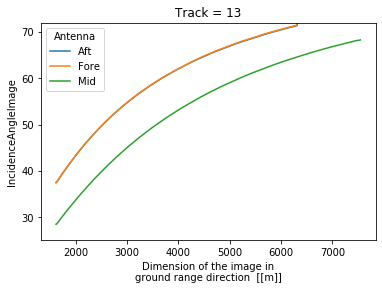

In [9]:
med.sel(Track=13).IncidenceAngleImage.plot(hue='Antenna')
plt.ylim([25,72])

In [10]:
med.sel(Track=13).IncidenceAngleImage

<xarray.DataArray 'IncidenceAngleImage' (Antenna: 3, GroundRange: 743)>
array([[ 37.4657135 ,  37.4657135 ,  37.60322189, ..., 146.56832886,
        146.56832886,          nan],
       [ 37.45425034,  37.45425034,  37.59175873, ..., 146.84908295,
        146.84908295,          nan],
       [ 28.45308495,  28.45308495,  28.57340431, ...,  68.26792145,
         68.29084015,          nan]])
Coordinates:
  * Antenna              (Antenna) object 'Aft' 'Fore' 'Mid'
  * GroundRange          (GroundRange) float64 1.616e+03 1.624e+03 ... 7.552e+03
    AntennaAzimuthImage  (Antenna, GroundRange) float64 nan 244.6 ... 270.1 nan
    IncidenceAngleImage  (Antenna, GroundRange) float64 37.47 37.47 ... nan
    Track                int64 13

### typical squint angle

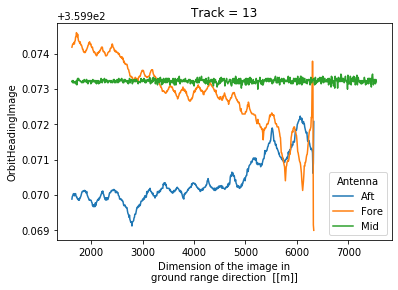

In [11]:
med.sel(Track=13).OrbitHeadingImage.plot(hue='Antenna')

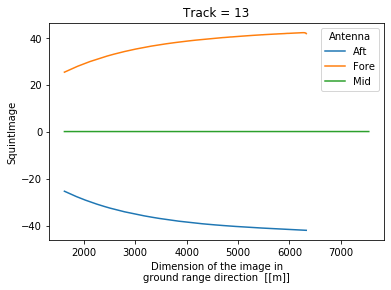

In [12]:
med.sel(Track=13).SquintImage.plot(hue='Antenna')

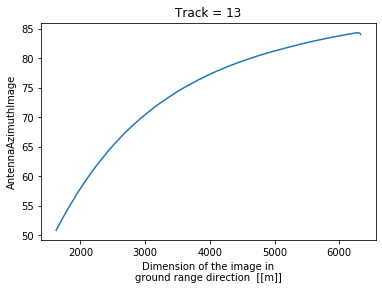

In [13]:
(  med.sel(Track=13).AntennaAzimuthImage.sel(Antenna='Fore')
 - med.sel(Track=13).AntennaAzimuthImage.sel(Antenna='Aft')).plot()


In [14]:
med.SquintImage

<xarray.DataArray 'SquintImage' (Track: 8, Antenna: 3, GroundRange: 743)>
array([[[         nan, -25.38776016, -25.47370338, ...,          nan,
                  nan,          nan],
        [         nan,  25.49089241,  25.57683563, ...,          nan,
                  nan,          nan],
        [         nan,   0.14323944,   0.14323944, ...,   0.1317803 ,
                  nan,          nan]],

       [[         nan, -25.49089241, -25.57683563, ...,          nan,
                  nan,          nan],
        [         nan,  25.43932724,  25.51954079, ...,          nan,
                  nan,          nan],
        [         nan,   0.0515662 ,   0.0515662 , ...,   0.09740283,
           0.09740283,          nan]],

       [[         nan, -25.35911179, -25.43932724, ...,          nan,
                  nan,          nan],
        [         nan,  25.49662209,  25.57683563, ...,          nan,
                  nan,          nan],
        [         nan,   0.12605071,   0.1317803 , ...,   0.14896902,
           0.13750988,          nan]],
...
       [[         nan, -25.54245949, -25.6284008 , ...,          nan,
                  nan,          nan],
        [         nan,  25.54245949,  25.6284008 , ...,          nan,
                  nan,          nan],
        [         nan,   0.07448451,   0.0773493 , ...,   0.08021409,
                  nan,          nan]],

       [[         nan, -25.51954079, -25.60548401, ...,          nan,
                  nan,          nan],
        [         nan,  25.43932724,  25.52526855, ...,          nan,
                  nan,          nan],
        [         nan,  -0.0515662 ,  -0.0515662 , ...,  -0.12032113,
          -0.11459156,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,  -0.08594367,
          -0.08594367,  -0.07448451]]])
Coordinates:
  * Antenna              (Antenna) object 'Aft' 'Fore' 'Mid'
  * GroundRange          (GroundRange) float64 1.616e+03 1.624e+03 ... 7.552e+03
    AntennaAzimuthImage  (Track, Antenna, GroundRange) float64 nan ... 135.0
    IncidenceAngleImage  (Track, Antenna, GroundRange) float64 37.45 ... 68.3
  * Track                (Track) int64 11 12 13 14 15 16 17 18

# compute alternative Squint and AntennaAzimuth

In [15]:
med['SquintFixed'] = ( ['Track', 'Antenna', 'GroundRange'], 
    np.stack(
        [-44 * np.ones_like(med.SquintImage.sel(Antenna='Aft')),
         +44 * np.ones_like(med.SquintImage.sel(Antenna='Fore')),
         np.zeros_like(med.SquintImage.sel(Antenna='Mid'))
        ], 
        axis=1
    )
)
med['AntennaAzimuthSquintFixed'] = np.mod(med.OrbitHeadingImage + 270 + med.SquintFixed, 360)

In [16]:
med['SquintModified'] = ( ['Track', 'Antenna', 'GroundRange'], 
    np.stack(
        [-90 - med.SquintImage.sel(Antenna='Aft'),
         90 - med.SquintImage.sel(Antenna='Fore'),
         med.SquintImage.sel(Antenna='Mid')
        ], 
        axis=1
    )
)
med['AntennaAzimuthSquintModified'] = np.mod(med.OrbitHeadingImage + 270 + med.SquintModified, 360)

In [17]:
med['GroundSquint'] = np.degrees(np.arcsin(
    np.sin(np.radians(med.SquintImage))
    / np.sin(np.radians(med.IncidenceAngleImage))
    ))
med['AntennaAzimuthGroundSquint'] = np.mod(med.OrbitHeadingImage + 270 + med.GroundSquint, 360)

/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in arcsin
  result_data = func(*input_data)


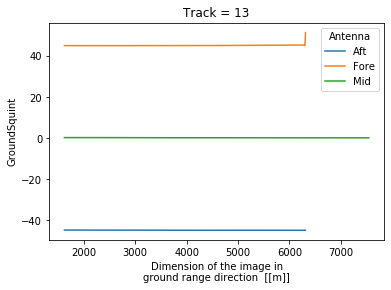

In [18]:
med.GroundSquint.sel(Track=13).plot(hue='Antenna')

In [19]:
med.GroundSquint

<xarray.DataArray 'GroundSquint' (Track: 8, Antenna: 3, GroundRange: 743)>
array([[[         nan, -44.83114886, -44.83282915, ...,          nan,
                  nan,          nan],
        [         nan,  45.08500486,  45.09314495, ...,          nan,
                  nan,          nan],
        [         nan,   0.30086909,   0.29976228, ...,   0.14185188,
                  nan,          nan]],

       [[         nan, -45.06999307, -45.07073806, ...,          nan,
                  nan,          nan],
        [         nan,  44.99157924,  44.9880408 , ...,          nan,
                  nan,          nan],
        [         nan,   0.10839264,   0.10797365, ...,   0.10485121,
           0.10483451,          nan]],

       [[         nan, -44.75632325, -44.74636787, ...,          nan,
                  nan,          nan],
        [         nan,  45.05954013,  45.04835761, ...,          nan,
                  nan,          nan],
        [         nan,   0.26456914,   0.27552796, ...,   0.16036707,
           0.14800757,          nan]],
...
       [[         nan, -44.98388109, -44.99257023, ...,          nan,
                  nan,          nan],
        [         nan,  44.96901358,  44.97036577, ...,          nan,
                  nan,          nan],
        [         nan,   0.15579009,   0.16116066, ...,   0.08634117,
                  nan,          nan]],

       [[         nan, -45.12273039, -45.13076626, ...,          nan,
                  nan,          nan],
        [         nan,  44.88708893,  44.89600923, ...,          nan,
                  nan,          nan],
        [         nan,  -0.1081129 ,  -0.10769639, ...,  -0.12952724,
          -0.12334454,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,  -0.09248631,
          -0.09249368,  -0.08016437]]])
Coordinates:
  * Antenna              (Antenna) object 'Aft' 'Fore' 'Mid'
  * GroundRange          (GroundRange) float64 1.616e+03 1.624e+03 ... 7.552e+03
    AntennaAzimuthImage  (Track, Antenna, GroundRange) float64 nan ... 135.0
    IncidenceAngleImage  (Track, Antenna, GroundRange) float64 37.45 ... 68.3
  * Track                (Track) int64 11 12 13 14 15 16 17 18

# Radial Velocity

(-1, 1)

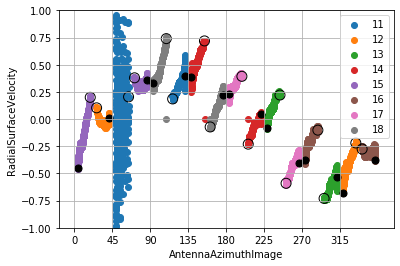

In [20]:
# Plot RVL as function of Antenna Azimuth for all (selected) incidence angle
fig = plt.figure()
ax = fig.add_subplot(111)
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=slice(7,500))\
    .plot.scatter(
        x='AntennaAzimuthImage', 
        y='RadialSurfaceVelocity', 
        hue='Track',
        hue_style='discrete',
        ax=ax,
)
# plot circle at near range
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=10)\
    .plot.scatter(
        x='AntennaAzimuthImage', 
        y='RadialSurfaceVelocity', 
        facecolors='none', edgecolors='k',
        s=100,
        ax=ax,
)
# plot filled circle at far range
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=500)\
    .plot.scatter(
        x='AntennaAzimuthImage', 
        y='RadialSurfaceVelocity', 
        facecolors='k', edgecolors='k',
        s=50,
        ax=ax,
)
plt.xticks(np.arange(0,360,45))
plt.grid()
plt.legend()
plt.ylim([-1,1])

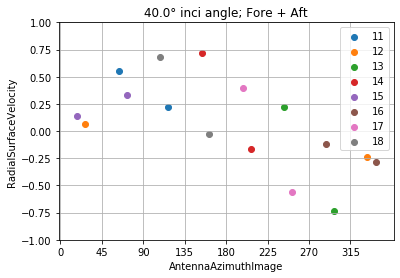

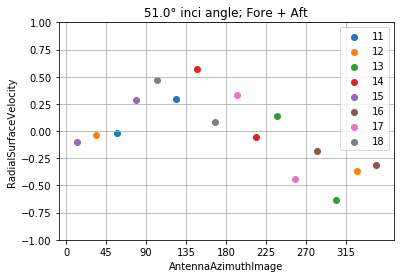

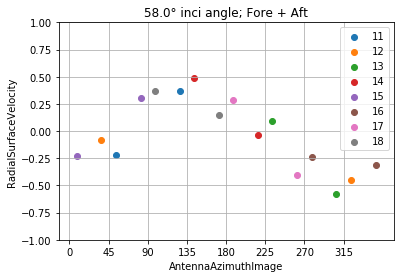

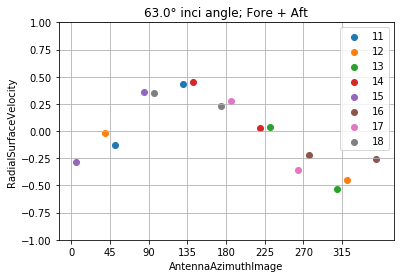

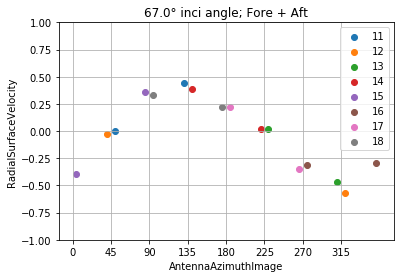

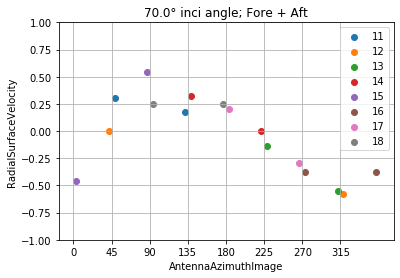

In [21]:
# RVL vs Azimuth at given Incidence Angle; Fore + Aft
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='RadialSurfaceVelocity', 
            hue='Track',
            hue_style='discrete',
    )
    plt.xticks(np.arange(0,360,45))
    plt.title(inci_str + '; Fore + Aft')
    plt.grid()
    plt.legend()
    plt.ylim([-1,1])

<Figure size 432x288 with 0 Axes>

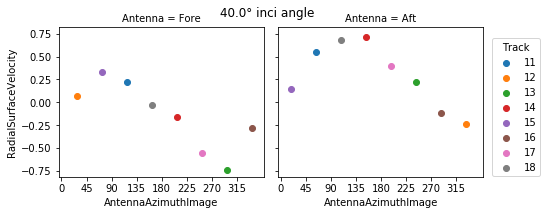

<Figure size 432x288 with 0 Axes>

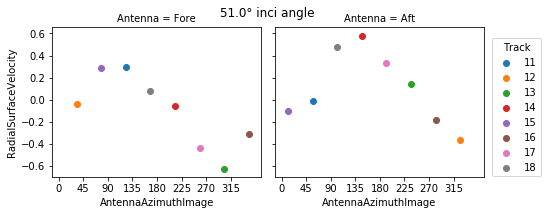

<Figure size 432x288 with 0 Axes>

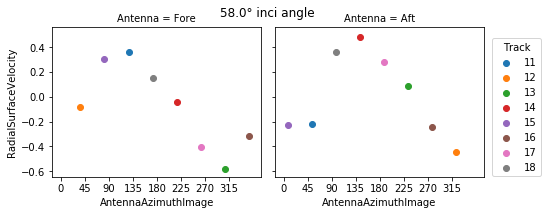

<Figure size 432x288 with 0 Axes>

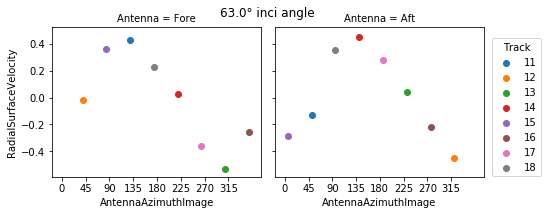

<Figure size 432x288 with 0 Axes>

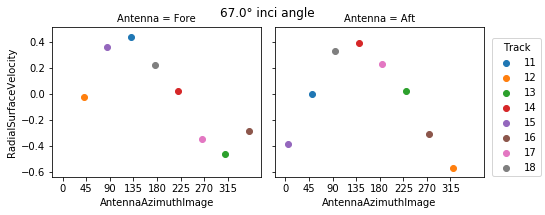

<Figure size 432x288 with 0 Axes>

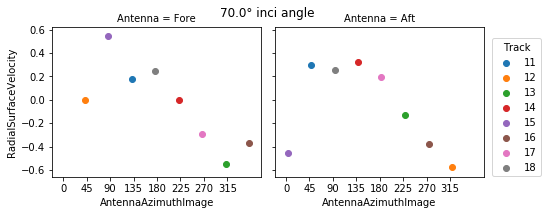

In [22]:
# Radial Velocity vs Azimuth given Incidence Angle; Fore / Aft
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    g = med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='RadialSurfaceVelocity', 
            hue='Track',
            hue_style='discrete',
            col='Antenna',
    )
    for i, ax in enumerate(g.axes.flat):
        ax.set_xticks(np.arange(0,360,45))
    g.fig.suptitle(inci_str)
#     plt.title(inci_str)
#     plt.grid()
#     plt.legend()
#     plt.ylim([-1,1])

# Sigma0 - Intensity

/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in log10
  result_dat

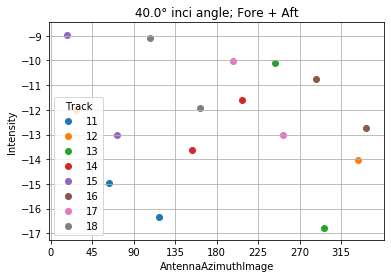

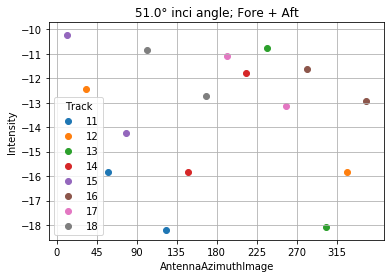

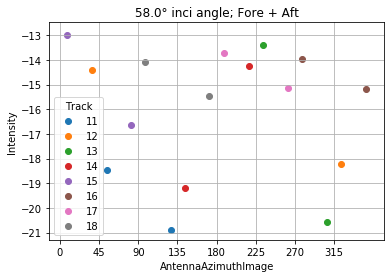

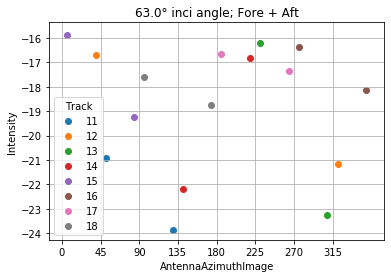

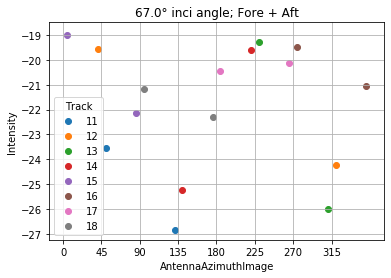

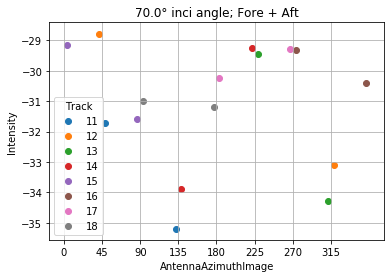

In [23]:
# Intensity vs Azimuth given Incidence Angle; Fore + Aft
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    (10*np.log10(med)).sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='Intensity', 
            hue='Track',
            hue_style='discrete',
    )
    plt.xticks(np.arange(0,360,45))
    plt.title(inci_str + '; Fore + Aft')
    plt.grid()
#     plt.legend()
#     plt.ylim([-1,1])

/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in log10
  result_dat

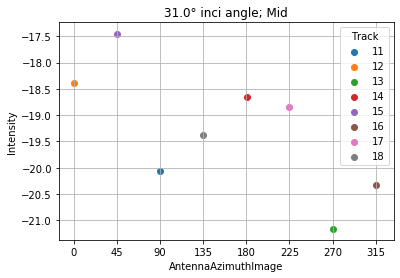

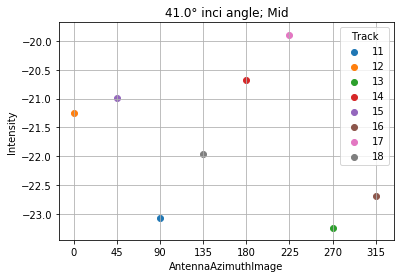

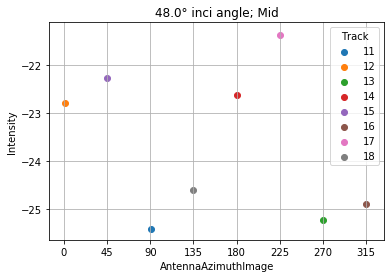

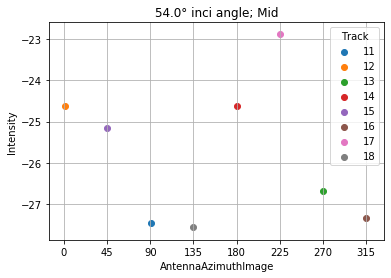

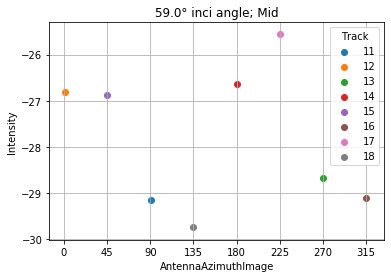

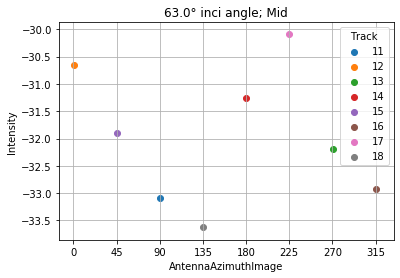

In [24]:
# Intensity vs Azimuth given Incidence Angle; Mid
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Mid').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    (10*np.log10(med)).sel(Antenna='Mid')\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='Intensity', 
            hue='Track',
            hue_style='discrete',
    )
    plt.xticks(np.arange(0,360,45))
    plt.title(inci_str + "; Mid")
    plt.grid()
#     plt.legend()
#     plt.ylim([-1,1])

/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in log10
  result_dat

<Figure size 432x288 with 0 Axes>

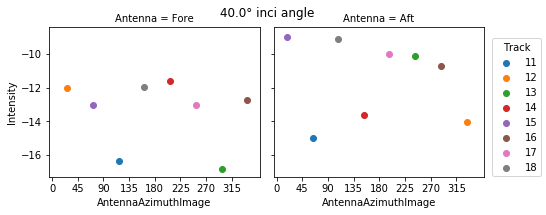

<Figure size 432x288 with 0 Axes>

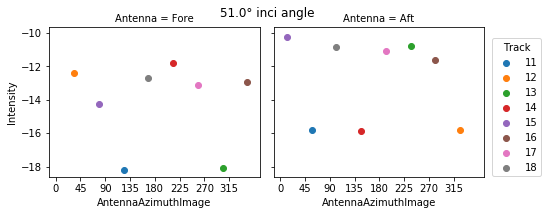

<Figure size 432x288 with 0 Axes>

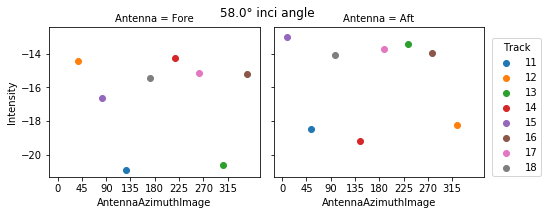

<Figure size 432x288 with 0 Axes>

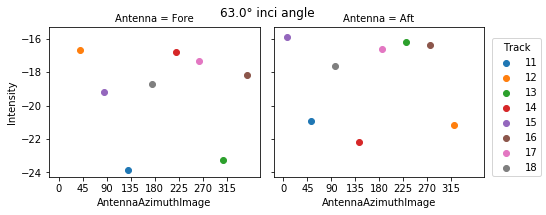

<Figure size 432x288 with 0 Axes>

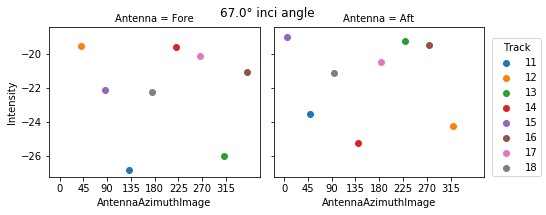

<Figure size 432x288 with 0 Axes>

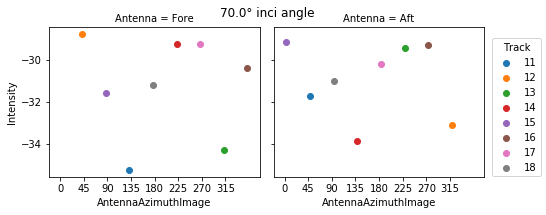

In [25]:
# Intensity vs Azimuth given Incidence Angle
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    g = (10*np.log10(med)).sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='Intensity', 
            hue='Track',
            hue_style='discrete',
            col='Antenna',
    )
    for i, ax in enumerate(g.axes.flat):
        ax.set_xticks(np.arange(0,360,45))
    g.fig.suptitle(inci_str)
#     plt.title(inci_str)
#     plt.grid()
#     plt.legend()
#     plt.ylim([-1,1])

# Coherence

(0, 1)

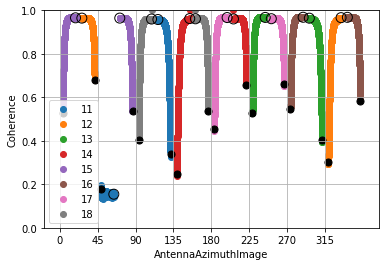

In [26]:
# Plot Coherence as function of Antenna Azimuth for all (selected) incidence angle
fig = plt.figure()
ax = fig.add_subplot(111)
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=slice(7,500))\
    .plot.scatter(
        x='AntennaAzimuthImage', 
        y='Coherence', 
        hue='Track',
        hue_style='discrete',
        ax=ax,
)
# plot circle at near range
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=10)\
    .plot.scatter(
        x='AntennaAzimuthImage', 
        y='Coherence', 
        facecolors='none', edgecolors='k',
        s=100,
        ax=ax,
)
# plot filled circle at far range
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=500)\
    .plot.scatter(
        x='AntennaAzimuthImage', 
        y='Coherence', 
        facecolors='k', edgecolors='k',
        s=50,
        ax=ax,
)
plt.xticks(np.arange(0,360,45))
plt.grid()
plt.legend()
plt.ylim([0,1])

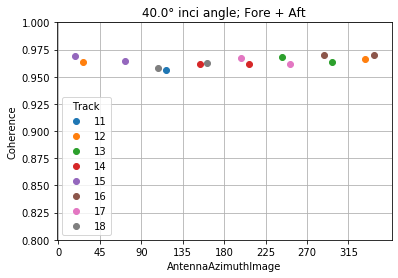

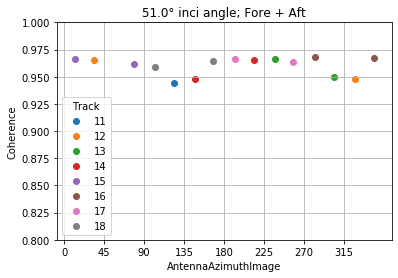

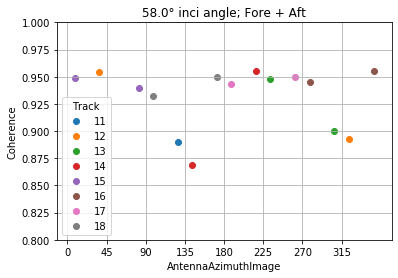

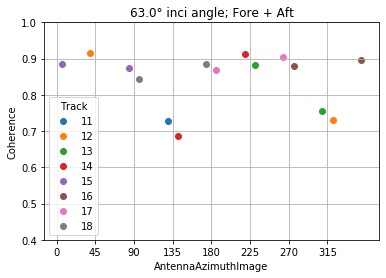

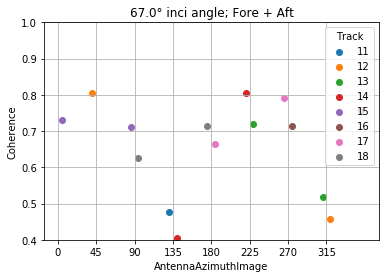

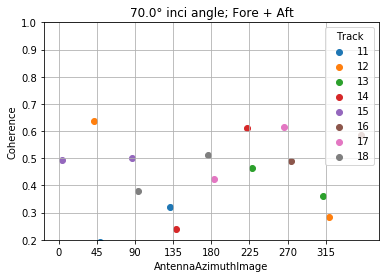

In [27]:
# Coherence vs Azimuth given Incidence Angle; Fore + Aft
inci_index = np.arange(20,600,100)
ylim_list = [[0.8, 1],
             [0.8, 1],
             [0.8, 1],
             [0.4, 1],
             [0.4, 1],
             [0.2, 1]]
for ii, index in enumerate(inci_index):
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='Coherence', 
            hue='Track',
            hue_style='discrete',
    )
    plt.xticks(np.arange(0,360,45))
    plt.title(inci_str + '; Fore + Aft')
    plt.grid()
#     plt.legend()
    plt.ylim(ylim_list[ii])

<Figure size 432x288 with 0 Axes>

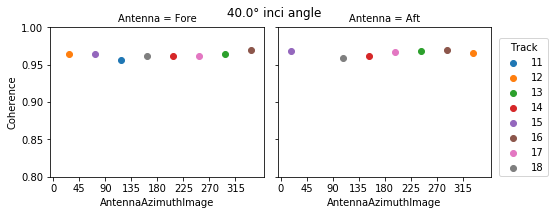

<Figure size 432x288 with 0 Axes>

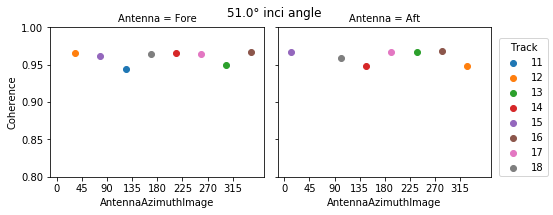

<Figure size 432x288 with 0 Axes>

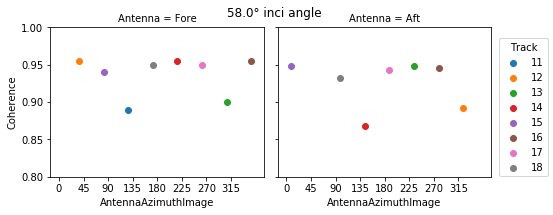

<Figure size 432x288 with 0 Axes>

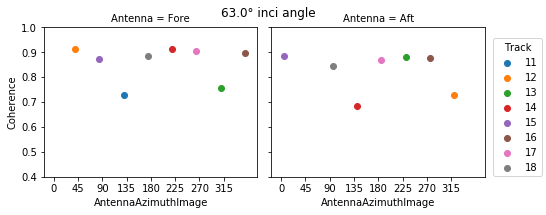

<Figure size 432x288 with 0 Axes>

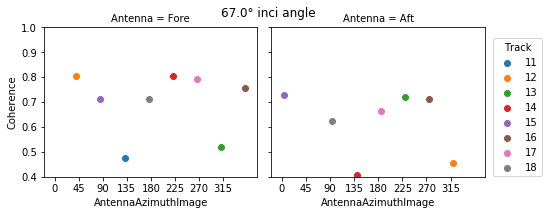

<Figure size 432x288 with 0 Axes>

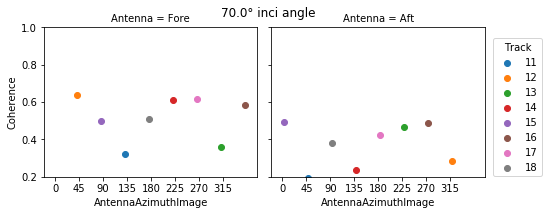

In [28]:
# Intensity vs Azimuth given Incidence Angle
inci_index = np.arange(20,600,100)
for ii, index in enumerate(inci_index):
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    g = med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='Coherence', 
            hue='Track',
            hue_style='discrete',
            col='Antenna',
    )
    for i, ax in enumerate(g.axes.flat):
        ax.set_xticks(np.arange(0,360,45))
        ax.set(ylim=ylim_list[ii])
    g.fig.suptitle(inci_str)
#     plt.title(inci_str)
#     plt.grid()
#     plt.legend()
#     plt.ylim([-1,1])

# Interferogram

(-0.3, 0.3)

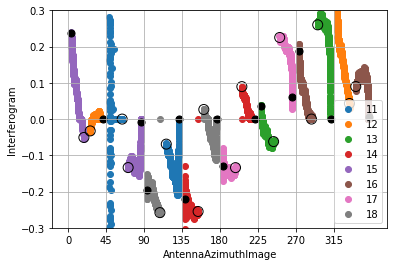

In [29]:
# Plot Interferogram as function of Antenna Azimuth for all (selected) incidence angle
fig = plt.figure()
ax = fig.add_subplot(111)
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=slice(7,500))\
    .plot.scatter(
        x='AntennaAzimuthImage', 
        y='Interferogram', 
        hue='Track',
        hue_style='discrete',
        ax=ax,
)
# plot circle at near range
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=10)\
    .plot.scatter(
        x='AntennaAzimuthImage', 
        y='Interferogram', 
        facecolors='none', edgecolors='k',
        s=100,
        ax=ax,
)
# plot filled circle at far range
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=500)\
    .plot.scatter(
        x='AntennaAzimuthImage', 
        y='Interferogram', 
        facecolors='k', edgecolors='k',
        s=50,
        ax=ax,
)
plt.xticks(np.arange(0,360,45))
plt.grid()
plt.legend()
plt.ylim([-.3,.3])

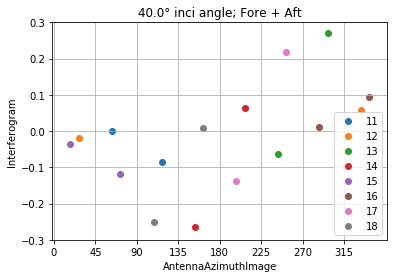

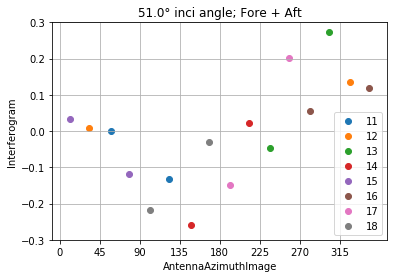

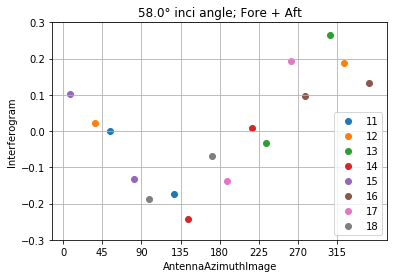

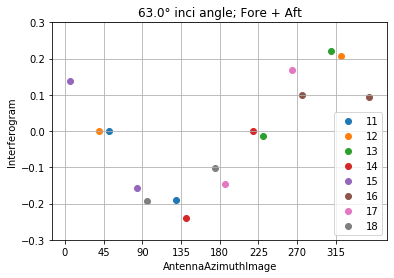

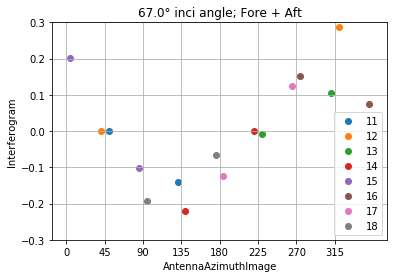

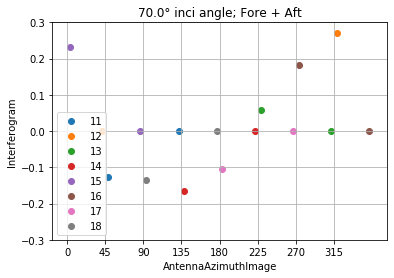

In [30]:
# Interferogram vs Azimuth at given Incidence Angle; Fore + Aft
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='Interferogram', 
            hue='Track',
            hue_style='discrete',
    )
    plt.xticks(np.arange(0,360,45))
    plt.title(inci_str + '; Fore + Aft')
    plt.grid()
    plt.legend()
    plt.ylim([-0.3,.3])

<Figure size 432x288 with 0 Axes>

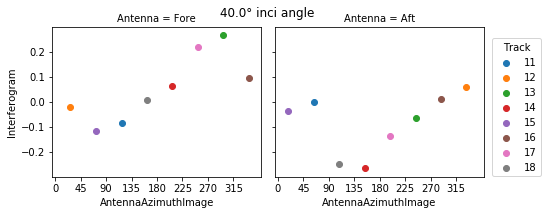

<Figure size 432x288 with 0 Axes>

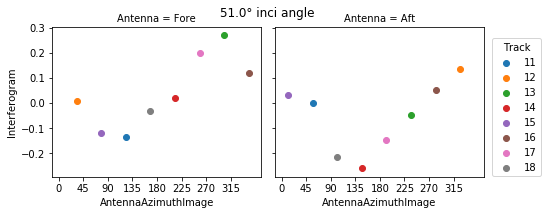

<Figure size 432x288 with 0 Axes>

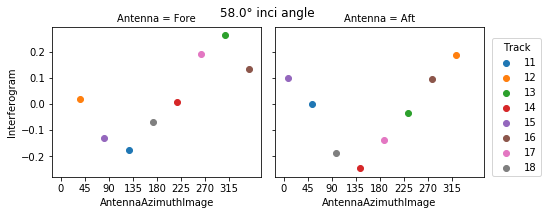

<Figure size 432x288 with 0 Axes>

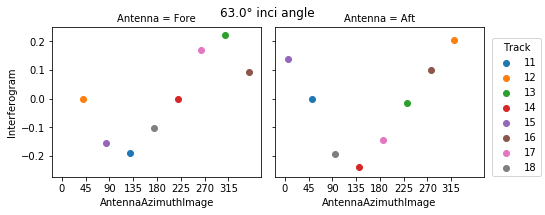

<Figure size 432x288 with 0 Axes>

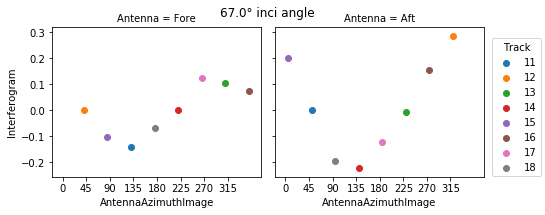

<Figure size 432x288 with 0 Axes>

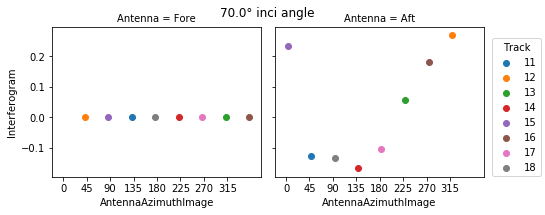

In [31]:
# Interferogram vs Azimuth given Incidence Angle; Fore / Aft
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    g = med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='Interferogram', 
            hue='Track',
            hue_style='discrete',
            col='Antenna',
    )
    for i, ax in enumerate(g.axes.flat):
        ax.set_xticks(np.arange(0,360,45))
    g.fig.suptitle(inci_str)
#     plt.title(inci_str)
#     plt.grid()
#     plt.legend()
#     plt.ylim([-1,1])

# Test by changing Squint

### Fixed Squint

(-0.4, 0.4)

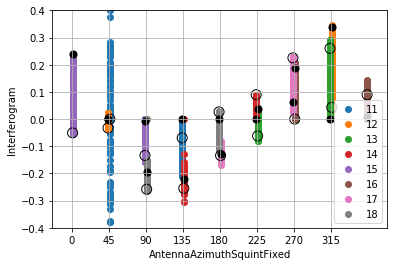

In [32]:
# Plot Interferogram as function of Antenna Azimuth for all (selected) incidence angle
fig = plt.figure()
ax = fig.add_subplot(111)
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=slice(7,500))\
    .plot.scatter(
        x='AntennaAzimuthSquintFixed', 
        y='Interferogram', 
        hue='Track',
        hue_style='discrete',
        ax=ax,
)
# plot circle at near range
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=10)\
    .plot.scatter(
        x='AntennaAzimuthSquintFixed', 
        y='Interferogram', 
        facecolors='none', edgecolors='k',
        s=100,
        ax=ax,
)
# plot filled circle at far range
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=500)\
    .plot.scatter(
        x='AntennaAzimuthSquintFixed', 
        y='Interferogram', 
        facecolors='k', edgecolors='k',
        s=50,
        ax=ax,
)
plt.xticks(np.arange(0,360,45))
plt.grid()
plt.legend()
plt.ylim([-.4,.4])

In [44]:
med['SquintFixed'] = ( ['Track', 'Antenna', 'GroundRange'], 
    np.stack(
        [-44 * np.ones_like(med.SquintImage.sel(Antenna='Aft')),
         +44 * np.ones_like(med.SquintImage.sel(Antenna='Fore')),
         np.zeros_like(med.SquintImage.sel(Antenna='Mid'))
        ], 
        axis=1
    )
)
med['AntennaAzimuthSquintFixed'] = np.mod(med.OrbitHeadingImage + 270 + med.SquintFixed, 360)

In [49]:
med['SquintModified'] = ( ['Track', 'Antenna', 'GroundRange'], 
    np.stack(
        [-90 - med.SquintImage.sel(Antenna='Aft'),
         90 - med.SquintImage.sel(Antenna='Fore'),
         med.SquintImage.sel(Antenna='Mid')
        ], 
        axis=1
    )
)
med['AntennaAzimuthSquintModified'] = np.mod(med.OrbitHeadingImage + 270 + med.SquintModified, 360)

In [80]:
med['GroundSquint'] = np.degrees(np.arcsin(
    np.sin(np.radians(med.SquintImage))
    / np.sin(np.radians(med.IncidenceAngleImage))
    ))
med['AntennaAzimuthGroundSquint'] = np.mod(med.OrbitHeadingImage + 270 + med.GroundSquint, 360)

/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in arcsin
  result_data = func(*input_data)


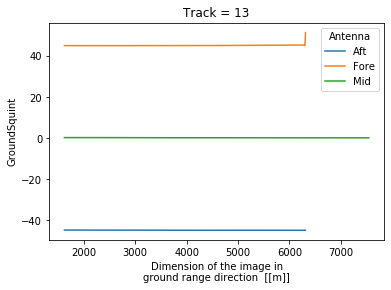

In [82]:
med.GroundSquint.sel(Track=13).plot(hue='Antenna')

In [85]:
med.GroundSquint

<xarray.DataArray 'GroundSquint' (Track: 8, Antenna: 3, GroundRange: 743)>
array([[[         nan, -44.83114886, -44.83282915, ...,          nan,
                  nan,          nan],
        [         nan,  45.08500486,  45.09314495, ...,          nan,
                  nan,          nan],
        [         nan,   0.30086909,   0.29976228, ...,   0.14185188,
                  nan,          nan]],

       [[         nan, -45.06999307, -45.07073806, ...,          nan,
                  nan,          nan],
        [         nan,  44.99157924,  44.9880408 , ...,          nan,
                  nan,          nan],
        [         nan,   0.10839264,   0.10797365, ...,   0.10485121,
           0.10483451,          nan]],

       [[         nan, -44.75632325, -44.74636787, ...,          nan,
                  nan,          nan],
        [         nan,  45.05954013,  45.04835761, ...,          nan,
                  nan,          nan],
        [         nan,   0.26456914,   0.27552796, ...,   0.16036707,
           0.14800757,          nan]],
...
       [[         nan, -44.98388109, -44.99257023, ...,          nan,
                  nan,          nan],
        [         nan,  44.96901358,  44.97036577, ...,          nan,
                  nan,          nan],
        [         nan,   0.15579009,   0.16116066, ...,   0.08634117,
                  nan,          nan]],

       [[         nan, -45.12273039, -45.13076626, ...,          nan,
                  nan,          nan],
        [         nan,  44.88708893,  44.89600923, ...,          nan,
                  nan,          nan],
        [         nan,  -0.1081129 ,  -0.10769639, ...,  -0.12952724,
          -0.12334454,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,  -0.09248631,
          -0.09249368,  -0.08016437]]])
Coordinates:
  * Antenna              (Antenna) object 'Aft' 'Fore' 'Mid'
  * GroundRange          (GroundRange) float64 1.616e+03 1.624e+03 ... 7.552e+03
    AntennaAzimuthImage  (Track, Antenna, GroundRange) float64 nan ... 135.0
    IncidenceAngleImage  (Track, Antenna, GroundRange) float64 37.45 ... 68.3
  * Track                (Track) int64 11 12 13 14 15 16 17 18

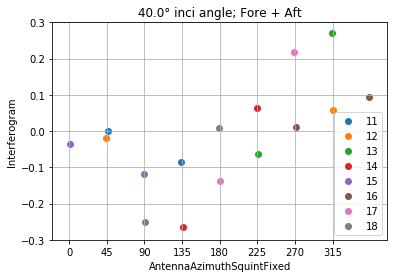

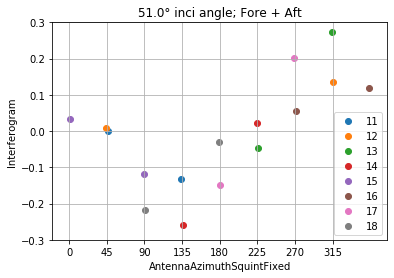

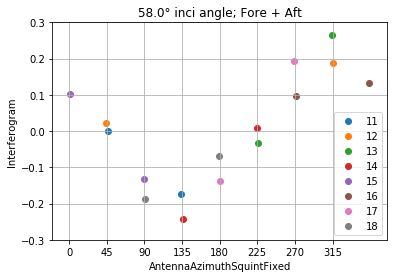

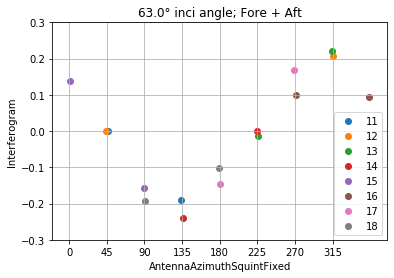

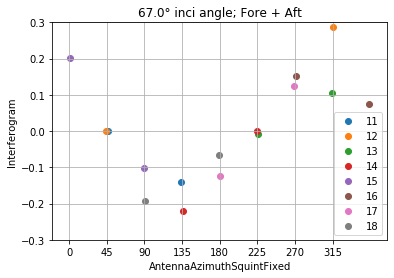

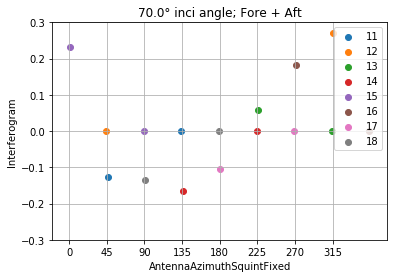

In [33]:
# Interferogram vs Azimuth at given Incidence Angle; Fore + Aft
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthSquintFixed', 
            y='Interferogram', 
            hue='Track',
            hue_style='discrete',
    )
    plt.xticks(np.arange(0,360,45))
    plt.title(inci_str + '; Fore + Aft')
    plt.grid()
    plt.legend()
    plt.ylim([-0.3,.3])

<Figure size 432x288 with 0 Axes>

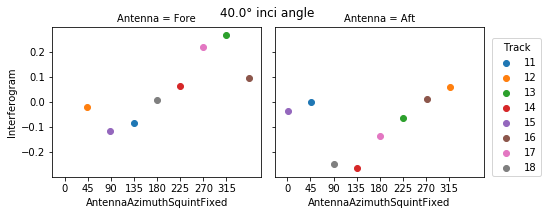

<Figure size 432x288 with 0 Axes>

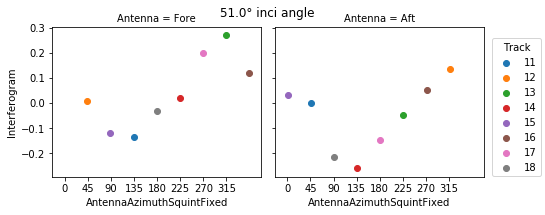

<Figure size 432x288 with 0 Axes>

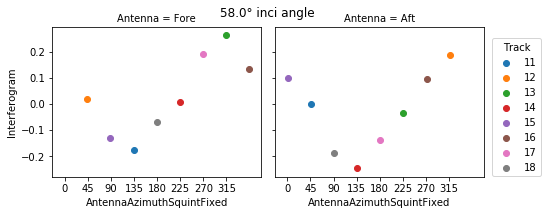

<Figure size 432x288 with 0 Axes>

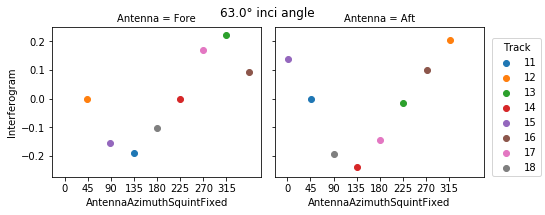

<Figure size 432x288 with 0 Axes>

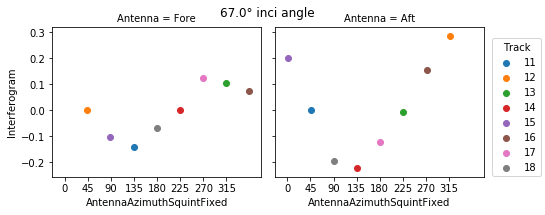

<Figure size 432x288 with 0 Axes>

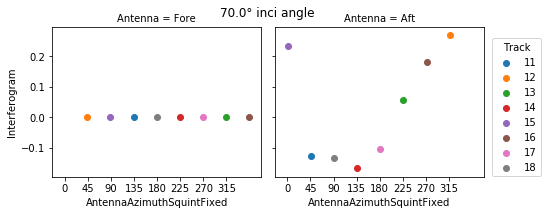

In [34]:
# Interferogram vs Azimuth given Incidence Angle; Fore / Aft
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    g = med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthSquintFixed', 
            y='Interferogram', 
            hue='Track',
            hue_style='discrete',
            col='Antenna',
    )
    for i, ax in enumerate(g.axes.flat):
        ax.set_xticks(np.arange(0,360,45))
    g.fig.suptitle(inci_str)
#     plt.title(inci_str)
#     plt.grid()
#     plt.legend()
#     plt.ylim([-1,1])

### with modified Squint

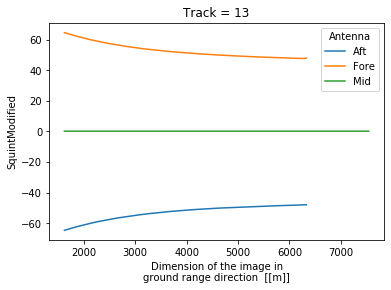

In [35]:
med.SquintModified.sel(Track=13).plot(hue='Antenna')

(-0.4, 0.4)

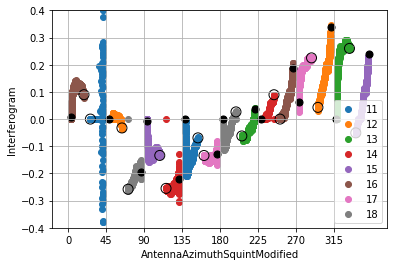

In [36]:
# Plot Interferogram as function of Antenna Azimuth for all (selected) incidence angle
fig = plt.figure()
ax = fig.add_subplot(111)
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=slice(7,500))\
    .plot.scatter(
        x='AntennaAzimuthSquintModified', 
        y='Interferogram', 
        hue='Track',
        hue_style='discrete',
        ax=ax,
)
# plot circle at near range
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=10)\
    .plot.scatter(
        x='AntennaAzimuthSquintModified', 
        y='Interferogram', 
        facecolors='none', edgecolors='k',
        s=100,
        ax=ax,
)
# plot filled circle at far range
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=500)\
    .plot.scatter(
        x='AntennaAzimuthSquintModified', 
        y='Interferogram', 
        facecolors='k', edgecolors='k',
        s=50,
        ax=ax,
)
plt.xticks(np.arange(0,360,45))
plt.grid()
plt.legend()
plt.ylim([-.4,.4])

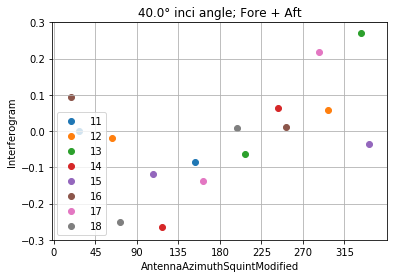

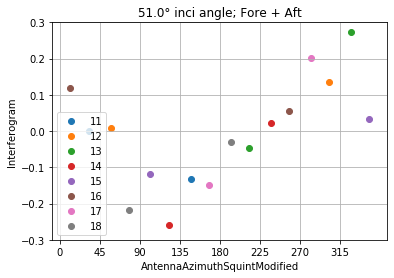

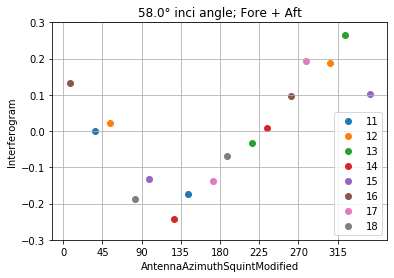

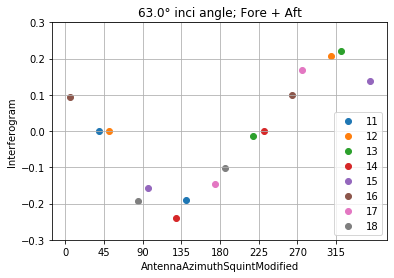

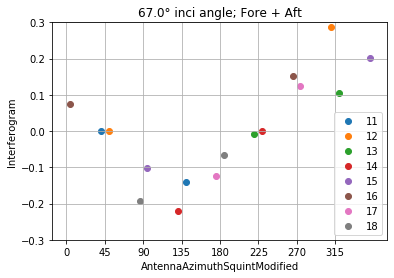

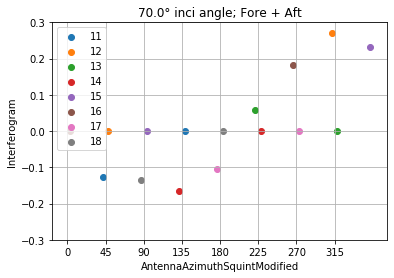

In [37]:
# Interferogram vs Azimuth at given Incidence Angle; Fore + Aft
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthSquintModified', 
            y='Interferogram', 
            hue='Track',
            hue_style='discrete',
    )
    plt.xticks(np.arange(0,360,45))
    plt.title(inci_str + '; Fore + Aft')
    plt.grid()
    plt.legend()
    plt.ylim([-0.3,.3])

<Figure size 432x288 with 0 Axes>

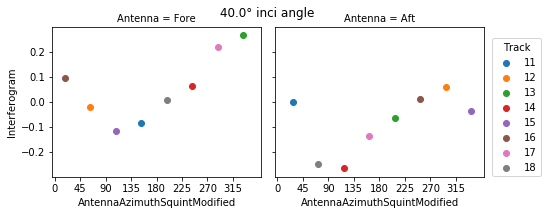

<Figure size 432x288 with 0 Axes>

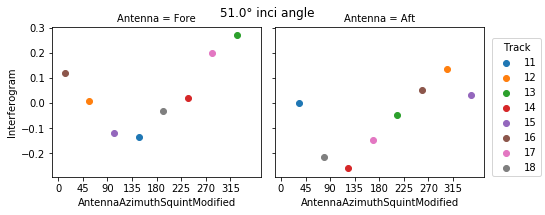

<Figure size 432x288 with 0 Axes>

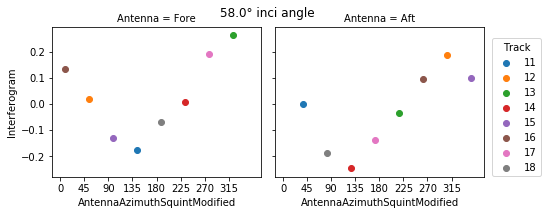

<Figure size 432x288 with 0 Axes>

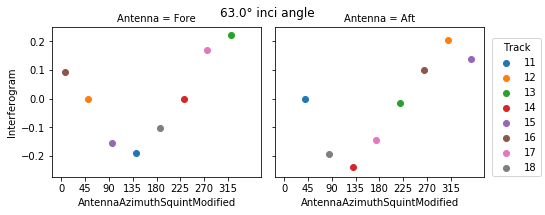

<Figure size 432x288 with 0 Axes>

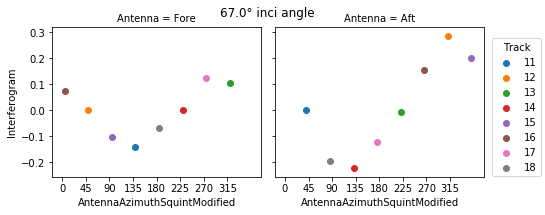

<Figure size 432x288 with 0 Axes>

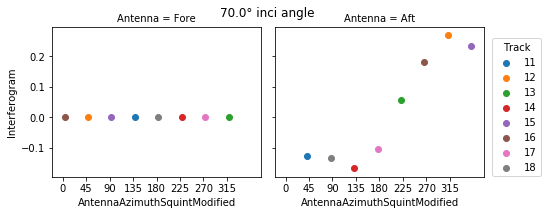

In [38]:
# Interferogram vs Azimuth given Incidence Angle; Fore / Aft
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    fig = plt.figure()
    g = med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthSquintModified', 
            y='Interferogram', 
            hue='Track',
            hue_style='discrete',
            col='Antenna',
    )
    for i, ax in enumerate(g.axes.flat):
        ax.set_xticks(np.arange(0,360,45))
    g.fig.suptitle(inci_str)
#     plt.grid()
#     plt.legend()
#     plt.ylim([-1,1])

(-1, 1)

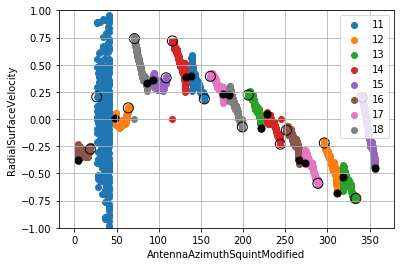

In [39]:
# Plot RVL as function of Antenna Azimuth for all (selected) incidence angle
fig = plt.figure()
ax = fig.add_subplot(111)
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=slice(7,500))\
    .plot.scatter(
        x='AntennaAzimuthSquintModified', 
        y='RadialSurfaceVelocity', 
        hue='Track',
        hue_style='discrete',
        ax=ax,
)
# plot circle at near range
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=10)\
    .plot.scatter(
        x='AntennaAzimuthSquintModified', 
        y='RadialSurfaceVelocity', 
        facecolors='none', edgecolors='k',
        s=100,
        ax=ax,
)
# plot filled circle at far range
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=500)\
    .plot.scatter(
        x='AntennaAzimuthSquintModified', 
        y='RadialSurfaceVelocity', 
        facecolors='k', edgecolors='k',
        s=50,
        ax=ax,
)
plt.grid()
plt.legend()
plt.ylim([-1,1])

# Ouessant

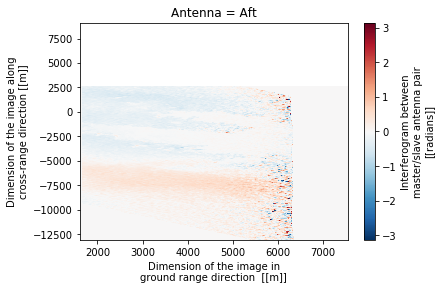

In [40]:
dsl1['Track_1b'].Interferogram.sel(Antenna='Aft').plot()

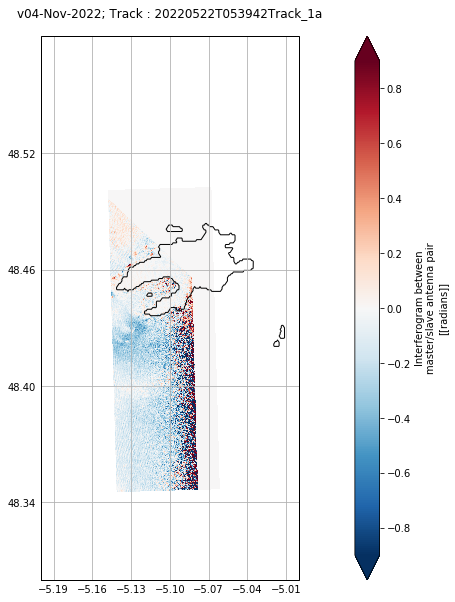

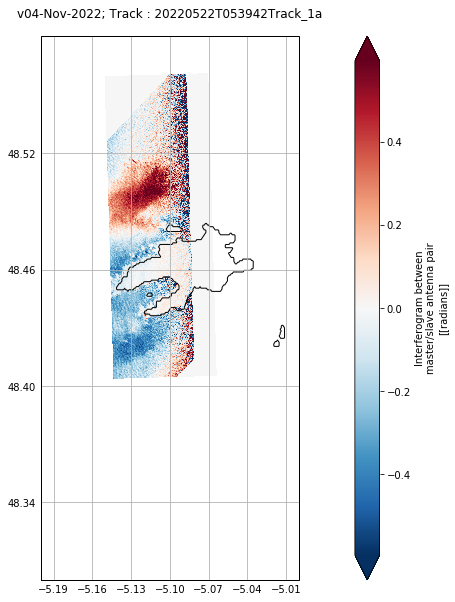

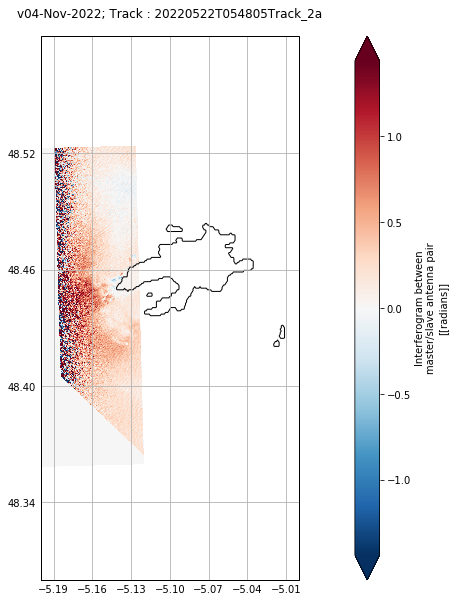

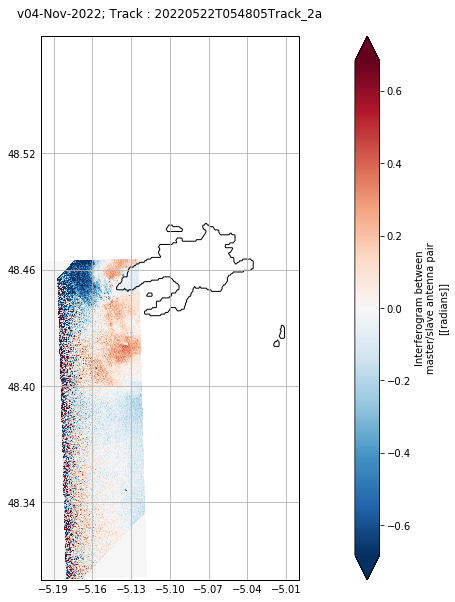

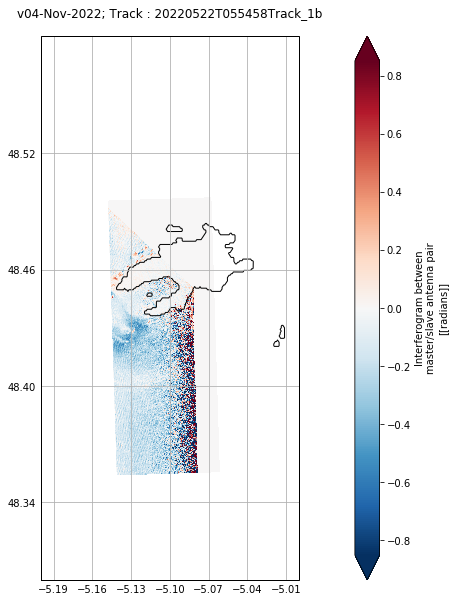

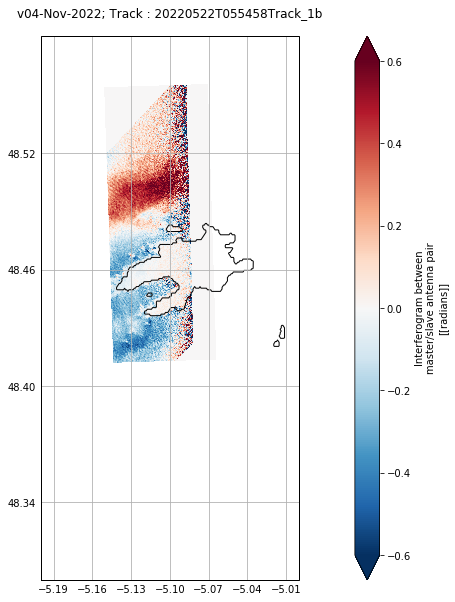

In [41]:
ouessant_tracks = ['Track_1a', 'Track_2a', 'Track_1b']

for track in ouessant_tracks:
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
    dsl1[track].sel(Antenna='Fore')\
        .Interferogram.plot(
            y='latitude',
            x='longitude',
            robust=True,
            transform=ccrs.PlateCarree()
    )
    plt.title(
        'v' + dsl1[track].attrs['History'][:11]
         + '; ' + dsl1[track].Title + track
        , y=1.025)
    gl=ax.gridlines(draw_labels=True)
    gl.xlabels_top=False
    gl.ylabels_right=False
    ax.set_extent([-5.2, -5.0, 48.30, 48.58], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.GSHHSFeature(scale='full'))
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
    dsl1[track].sel(Antenna='Aft')\
        .Interferogram.plot(
            y='latitude',
            x='longitude',
            robust=True,
            transform=ccrs.PlateCarree()
    )
    plt.title(
        'v' + dsl1[track].attrs['History'][:11]
        + '; ' + dsl1[track].Title + track
        , y=1.025)
    gl=ax.gridlines(draw_labels=True)
    gl.xlabels_top=False
    gl.ylabels_right=False
    ax.set_extent([-5.2, -5.0, 48.30, 48.58], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.GSHHSFeature(scale='full'))


# Land

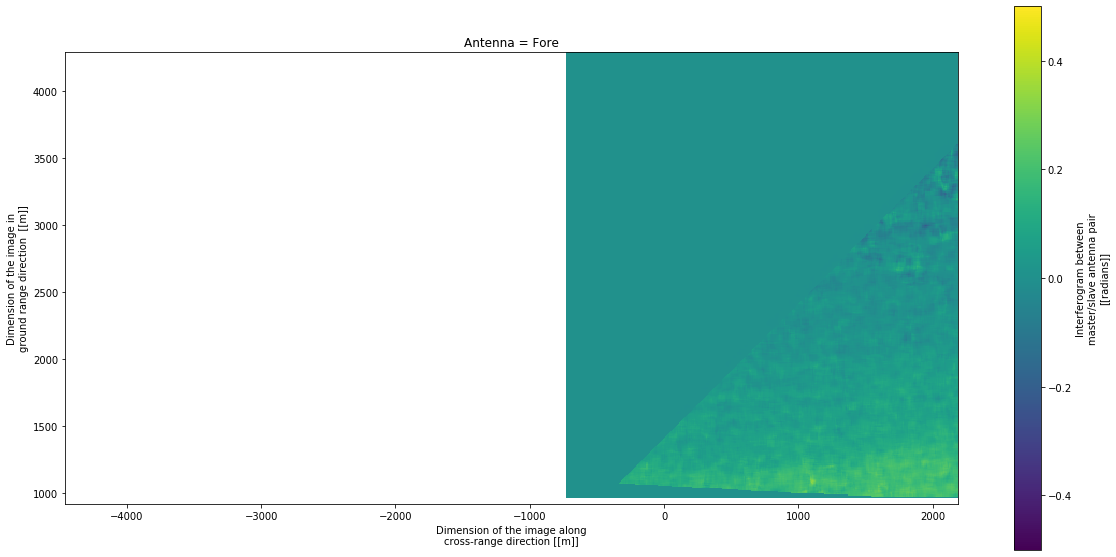

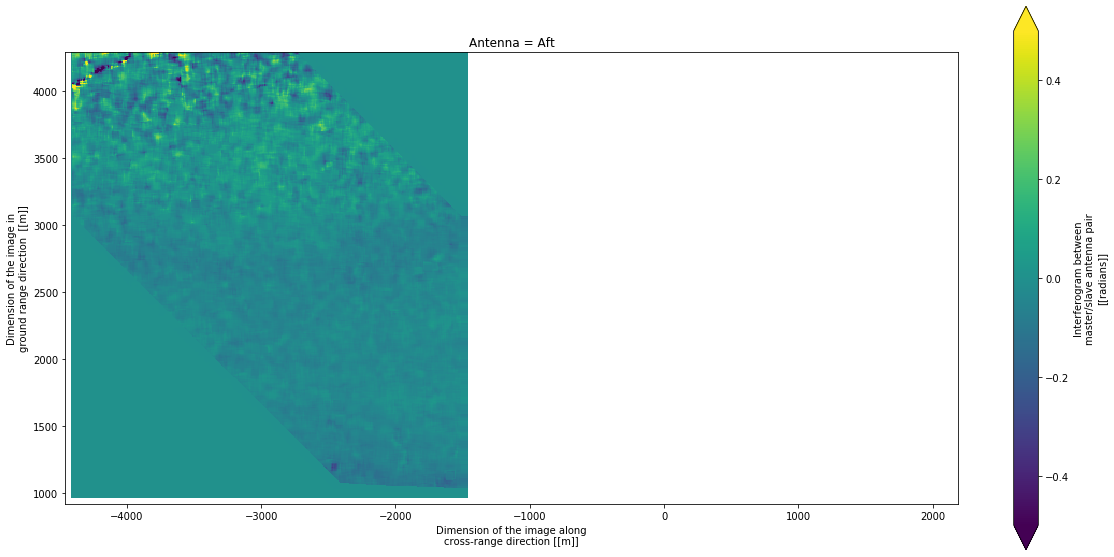

In [42]:
fig = plt.figure(figsize=(20, 10))
ax = dsl1['Track_L1'].sel(Antenna='Fore')\
    .Interferogram.plot(
        y='GroundRange', x='CrossRange',
        vmin=-0.5, vmax=0.5,

)
ax.axes.set_aspect('equal')

fig = plt.figure(figsize=(20, 10))
ax = dsl1['Track_L1'].sel(Antenna='Aft')\
    .Interferogram.plot(
        y='GroundRange', x='CrossRange',
        vmin=-0.5, vmax=0.5,

)
ax.axes.set_aspect('equal')

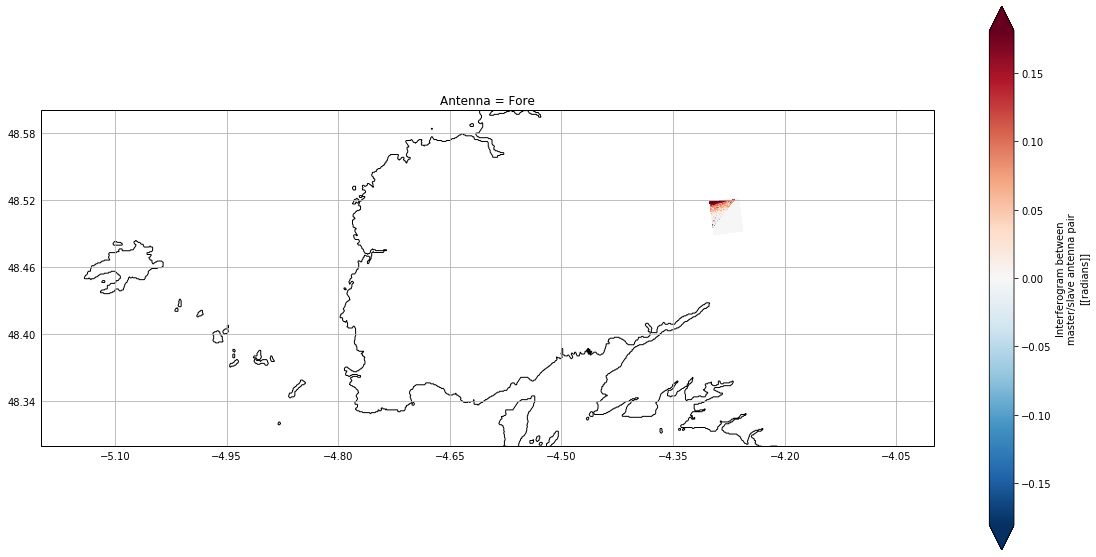

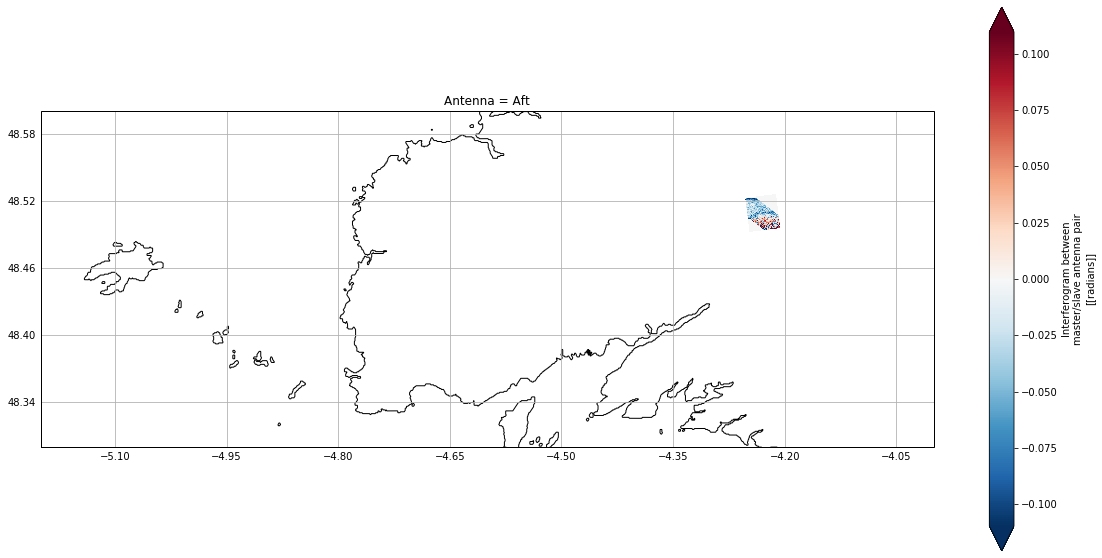

In [43]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
dsl1['Track_L1'].sel(Antenna='Fore')\
    .Interferogram.plot(
        y='latitude',
        x='longitude',
        robust=True,
        transform=ccrs.PlateCarree()
)
gl=ax.gridlines(draw_labels=True)
gl.xlabels_top=False
gl.ylabels_right=False
ax.set_extent([-5.2, -4.0, 48.30, 48.6], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.GSHHSFeature())

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
dsl1['Track_L1'].sel(Antenna='Aft')\
    .Interferogram.plot(
        y='latitude',
        x='longitude',
        robust=True,
        transform=ccrs.PlateCarree()
)
gl=ax.gridlines(draw_labels=True)
gl.xlabels_top=False
gl.ylabels_right=False
ax.set_extent([-5.2, -4.0, 48.30, 48.6], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.GSHHSFeature())

# Pickle

In [44]:
import pickle
import bz2
import datetime as dt

In [45]:
today = dt.date.today().strftime("%Y%m%d")

In [46]:
out_pickle_name = 'trash' + today

In [47]:
with bz2.BZ2File(out_pickle_name + '.pbz2', 'w') as sf: pickle.dump(dsl1['Track_11'], sf)